In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.python.keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from keras import regularizers

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from prettytable import PrettyTable

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

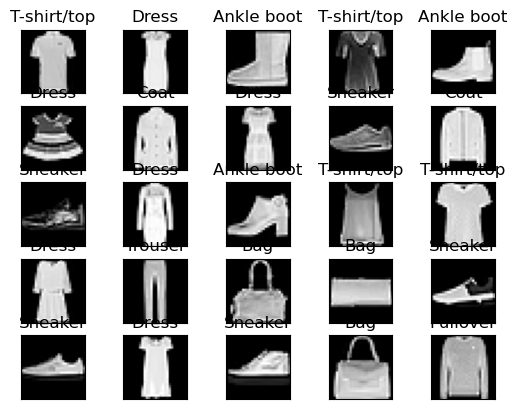

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(5, 5)
ax = ax.flatten()
for i in range(25):
    img = x_train[i]
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(class_names[y_train[i]])
plt.show()

In [5]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
X_val = x_test.reshape(x_val.shape[0], 28, 28, 1)
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_val = x_test.astype('float32')
print(X_val.shape)
print(X_test.shape)

(12000, 28, 28)
(12000, 28, 28)


In [6]:
X_train /= 255
X_test /= 255
X_val /= 255

In [7]:
n_classes = 10
print("Shape before one-hot encoding: ", y_val.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
print("Shape after one-hot encoding: ", Y_val.shape)

Shape before one-hot encoding:  (12000,)
Shape after one-hot encoding:  (12000, 10)


# Using my custom CNN Architecture.

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
#,kernel_regularizer=regularizers.l2(0.01)
# dropout layer
model.add(Dropout(rate = 0.5))
# output layer
model.add(Dense(10, activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               313700    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

# Using Lenet-5's Architecture

In [10]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2),strides=2))
model2.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2), strides = 2))

model2.add(Flatten())
# hidden layer
model2.add(Dense(120, activation='relu'))
model2.add(Dropout(rate=0.5))
# output layer
model2.add(Dense(84, activation = "relu"))
model2.add(Dense(10, activation='softmax'))

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          12832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 120)              

# Using VGG like model

In [12]:
model3 = Sequential()
model3.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model3.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(2,2),strides=2))
model3.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model3.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(2,2), strides = 2))

model3.add(Flatten())
# hidden layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(rate=0.6))
# output layer
#model3.add(Dense(84, activation = "relu"))
model3.add(Dense(10, activation='softmax'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 32)          25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                 

In [14]:
# compiling the sequential model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model2.fit(X_train, Y_train, batch_size=32, epochs=1, validation_split=0.2)

900/900 [==============================] - 19s 18ms/step - loss: 0.7628 - accuracy: 0.7138 - val_loss: 0.4764 - val_accuracy: 0.8292


In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(36000, 28, 28)
(36000, 10)
(12000, 28, 28)
(12000, 10)


In [16]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=32, epochs=1, validation_split=0.2)

900/900 [==============================] - 13s 13ms/step - loss: 0.6015 - accuracy: 0.7896 - val_loss: 0.3493 - val_accuracy: 0.8754


In [17]:
# compiling the sequential model
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model3.fit(X_train, Y_train, batch_size=16, epochs=1, validation_split=0.2)

1800/1800 [==============================] - 34s 18ms/step - loss: 0.6470 - accuracy: 0.7590 - val_loss: 0.4307 - val_accuracy: 0.8519


Epoch 1/20
900/900 [==============================] - 11s 12ms/step - loss: 0.4044 - accuracy: 0.8577 - val_loss: 0.3019 - val_accuracy: 0.8933
Epoch 2/20
900/900 [==============================] - 11s 13ms/step - loss: 0.3581 - accuracy: 0.8722 - val_loss: 0.2896 - val_accuracy: 0.8968
Epoch 3/20
900/900 [==============================] - 12s 13ms/step - loss: 0.3251 - accuracy: 0.8827 - val_loss: 0.2750 - val_accuracy: 0.8993
Epoch 4/20
900/900 [==============================] - 12s 13ms/step - loss: 0.3045 - accuracy: 0.8906 - val_loss: 0.2738 - val_accuracy: 0.8990
Epoch 5/20
900/900 [==============================] - 12s 13ms/step - loss: 0.2894 - accuracy: 0.8941 - val_loss: 0.2560 - val_accuracy: 0.9071
Epoch 6/20
900/900 [==============================] - 11s 12ms/step - loss: 0.2704 - accuracy: 0.9007 - val_loss: 0.2609 - val_accuracy: 0.9044
Epoch 7/20
900/900 [==============================] - 11s 12ms/step - loss: 0.2580 - accuracy: 0.9047 - val_loss: 0.2539 - val_accuracy:

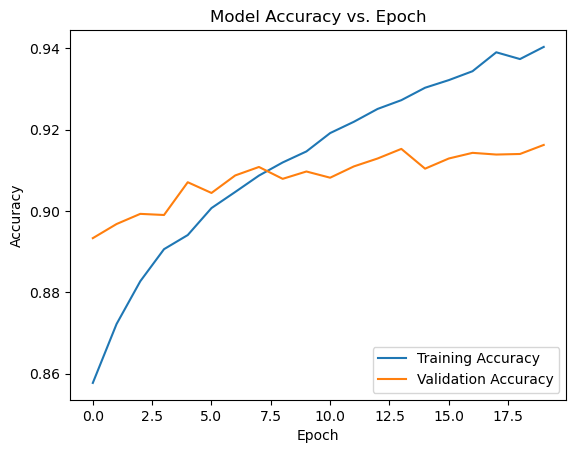

+-------+--------------------+---------------------+
| Epoch | Training Accuracy  | Validation Accuracy |
+-------+--------------------+---------------------+
|   1   | 0.8577430844306946 |  0.8933333158493042 |
|   2   | 0.8722222447395325 |  0.8968055844306946 |
|   3   | 0.8827430605888367 |  0.8993055820465088 |
|   4   |      0.890625      |  0.8990277647972107 |
|   5   | 0.8940972089767456 |  0.9070833325386047 |
|   6   | 0.9007291793823242 |  0.9044444561004639 |
|   7   | 0.9046875238418579 |  0.9087499976158142 |
|   8   | 0.9087152481079102 |  0.9108333587646484 |
|   9   | 0.9119444489479065 |  0.9079166650772095 |
|   10  | 0.9146527647972107 |  0.9097222089767456 |
|   11  | 0.9191666841506958 |  0.9081944227218628 |
|   12  | 0.9219444394111633 |  0.9109722375869751 |
|   13  | 0.9251041412353516 |  0.9129166603088379 |
|   14  | 0.9272569417953491 |  0.9152777791023254 |
|   15  | 0.9303125143051147 |  0.9104166626930237 |
|   16  | 0.9321874976158142 |  0.912916660308

In [18]:
import matplotlib.pyplot as plt

# Train the model for different number of epochs
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

# Plot the training and validation accuracy for each epoch
#plt.figure(figsize=(6,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

table = PrettyTable()
table.field_names = ["Epoch", "Training Accuracy", "Validation Accuracy"]

# add rows to the table
for i, acc in enumerate(history.history['accuracy']):
    table.add_row([i+1, acc, history.history['val_accuracy'][i]])

# print the table
print(table)


Epoch 1/20
900/900 [==============================] - 14s 15ms/step - loss: 0.5016 - accuracy: 0.8188 - val_loss: 0.3787 - val_accuracy: 0.8636
Epoch 2/20
900/900 [==============================] - 19s 21ms/step - loss: 0.4303 - accuracy: 0.8456 - val_loss: 0.3447 - val_accuracy: 0.8765
Epoch 3/20
900/900 [==============================] - 21s 23ms/step - loss: 0.3875 - accuracy: 0.8600 - val_loss: 0.3105 - val_accuracy: 0.8861
Epoch 4/20
900/900 [==============================] - 17s 19ms/step - loss: 0.3562 - accuracy: 0.8714 - val_loss: 0.3159 - val_accuracy: 0.8839
Epoch 5/20
900/900 [==============================] - 16s 17ms/step - loss: 0.3345 - accuracy: 0.8776 - val_loss: 0.2972 - val_accuracy: 0.8940
Epoch 6/20
900/900 [==============================] - 16s 18ms/step - loss: 0.3138 - accuracy: 0.8851 - val_loss: 0.3171 - val_accuracy: 0.8800
Epoch 7/20
900/900 [==============================] - 17s 19ms/step - loss: 0.2971 - accuracy: 0.8922 - val_loss: 0.2840 - val_accuracy:

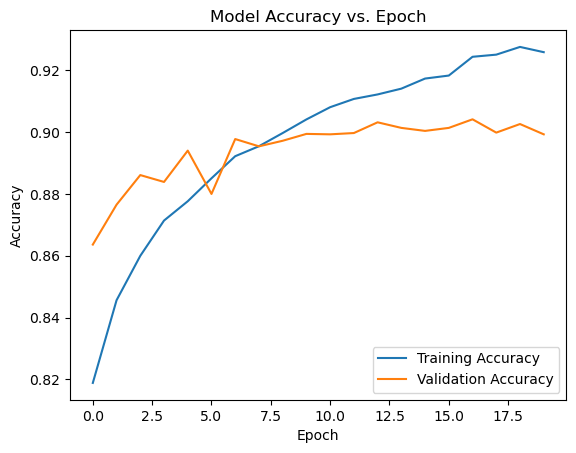

+-------+--------------------+---------------------+
| Epoch | Training Accuracy  | Validation Accuracy |
+-------+--------------------+---------------------+
|   1   | 0.8188194632530212 |  0.863611102104187  |
|   2   | 0.8455902934074402 |  0.8765277862548828 |
|   3   | 0.8599652647972107 |  0.8861111402511597 |
|   4   | 0.8713889122009277 |  0.8838889002799988 |
|   5   | 0.8776388764381409 |  0.8940277695655823 |
|   6   | 0.8850694298744202 |  0.8799999952316284 |
|   7   | 0.8922222256660461 |  0.897777795791626  |
|   8   | 0.8954513669013977 |  0.8954166769981384 |
|   9   | 0.8997222185134888 |  0.8972222208976746 |
|   10  | 0.9041319489479065 |  0.8994444608688354 |
|   11  | 0.9080902934074402 |  0.8993055820465088 |
|   12  | 0.9107638597488403 |  0.8997222185134888 |
|   13  | 0.9122222065925598 |  0.9031944274902344 |
|   14  | 0.914097249507904  |  0.9013888835906982 |
|   15  | 0.9173611402511597 |  0.9004166722297668 |
|   16  | 0.9183333516120911 |  0.901388883590

In [19]:
import matplotlib.pyplot as plt

# Train the model for different number of epochs
history = model2.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

table = PrettyTable()
table.field_names = ["Epoch", "Training Accuracy", "Validation Accuracy"]

# add rows to the table
for i, acc in enumerate(history.history['accuracy']):
    table.add_row([i+1, acc, history.history['val_accuracy'][i]])

# print the table
print(table)


Epoch 1/20
900/900 [==============================] - 31s 33ms/step - loss: 0.3950 - accuracy: 0.8567 - val_loss: 0.3317 - val_accuracy: 0.8811
Epoch 2/20
900/900 [==============================] - 27s 30ms/step - loss: 0.3452 - accuracy: 0.8733 - val_loss: 0.3005 - val_accuracy: 0.8914
Epoch 3/20
900/900 [==============================] - 26s 28ms/step - loss: 0.3138 - accuracy: 0.8858 - val_loss: 0.3038 - val_accuracy: 0.8896
Epoch 4/20
900/900 [==============================] - 25s 28ms/step - loss: 0.2849 - accuracy: 0.8965 - val_loss: 0.2931 - val_accuracy: 0.8982
Epoch 5/20
900/900 [==============================] - 25s 28ms/step - loss: 0.2650 - accuracy: 0.9038 - val_loss: 0.2864 - val_accuracy: 0.8938
Epoch 6/20
900/900 [==============================] - 26s 28ms/step - loss: 0.2477 - accuracy: 0.9091 - val_loss: 0.2636 - val_accuracy: 0.9056
Epoch 7/20
900/900 [==============================] - 27s 30ms/step - loss: 0.2328 - accuracy: 0.9132 - val_loss: 0.2715 - val_accuracy:

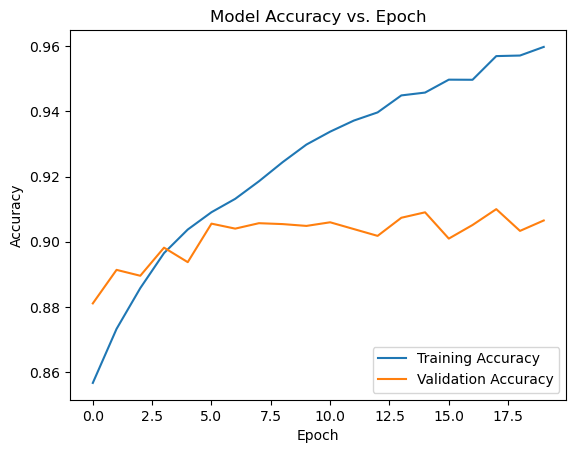

+-------+--------------------+---------------------+
| Epoch | Training Accuracy  | Validation Accuracy |
+-------+--------------------+---------------------+
|   1   | 0.8567361235618591 |  0.8811110854148865 |
|   2   | 0.8732985854148865 |  0.8913888931274414 |
|   3   | 0.8857986330986023 |  0.8895833492279053 |
|   4   | 0.8965277671813965 |  0.898194432258606  |
|   5   | 0.9037500023841858 |  0.893750011920929  |
|   6   | 0.9090625047683716 |  0.9055555462837219 |
|   7   | 0.9131597280502319 |  0.9040277600288391 |
|   8   | 0.918541669845581  |  0.9056944251060486 |
|   9   | 0.9244097471237183 |  0.9054166674613953 |
|   10  | 0.9297916889190674 |  0.9048610925674438 |
|   11  | 0.9337499737739563 |  0.9059722423553467 |
|   12  | 0.9371528029441833 |  0.9038888812065125 |
|   13  | 0.9396528005599976 |  0.901805579662323  |
|   14  | 0.944861114025116  |  0.9073610901832581 |
|   15  | 0.9457291960716248 |  0.9090277552604675 |
|   16  | 0.9496874809265137 |  0.900972247123

In [20]:
import matplotlib.pyplot as plt

# Train the model for different number of epochs
history = model3.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

# create a table with column names
table = PrettyTable()
table.field_names = ["Epoch", "Training Accuracy", "Validation Accuracy"]

# add rows to the table
for i, acc in enumerate(history.history['accuracy']):
    table.add_row([i+1, acc, history.history['val_accuracy'][i]])

# print the table
print(table)
